# Graduate Rotational Internship Program of **The Sparks Foundation**
<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TASK-2:- To Explore Supervised Machine Learning

<b>-------------------------------------------------------------------------------------------------------------------</b>

##  Problem statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

## Data Preprocessing 

### A) Importing Required Libraries

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### B) Import Dataset


Data available at url <b>http://bit.ly/w-data</b>.

In [2]:
dataset =pd.read_csv("http://bit.ly/w-data")

<IPython.core.display.Javascript object>

In [4]:
type(dataset)

pandas.core.frame.DataFrame

Using the <b>Head</b> function we can see First five rows of our dataset.

In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


We are using <b>Info</b> function to Overview of dataset.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Now, To get the datatype of our particuar column, we will use <b>dtypes</b> as shown

In [7]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
dataset.shape 

(25, 2)

Let's Check unique values in <b>Hours</b> and <b>Scores</b> column using <b>unique</b> functoion.

In [9]:
dataset['Hours'].unique()  

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [10]:
dataset['Scores'].unique()  

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

Now, We will check if our dataset contains any null values or not.

In [11]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

 ### C) Statistical Information 

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### D) Split Independent & Dependent Variables

Now, We want to convert x & y to numpy array from DataFrame.

In [13]:
X= dataset.iloc[:,:1]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
type(X)

pandas.core.frame.DataFrame

In [15]:
X= dataset.iloc[:,:-1].values
print(X[0:5])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]


In [16]:
type(X)

numpy.ndarray

In [17]:
y= dataset.iloc[:,1:]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [18]:
type(y)

pandas.core.frame.DataFrame

In [19]:
y= dataset.iloc[:,1:].values
print(y[0:5])

[[21]
 [47]
 [27]
 [75]
 [30]]


### E) Let's Visualize Countplot using Seaborn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

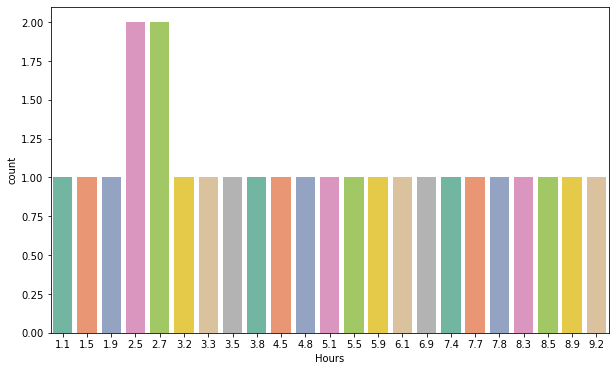

In [5]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Hours', ax=ax, data=dataset, palette = "Set2")

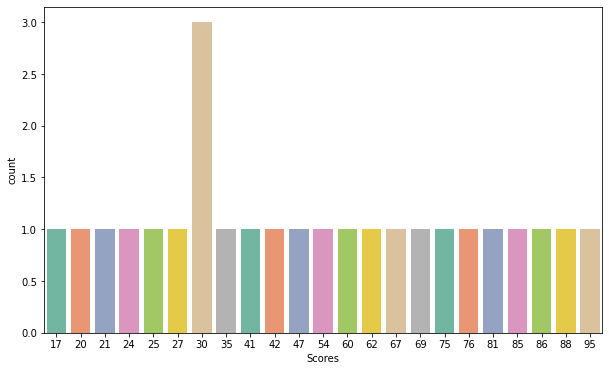

In [21]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Scores', ax=ax, data=dataset, palette = "Set2")

### F) Plotting the distribution of Scores


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

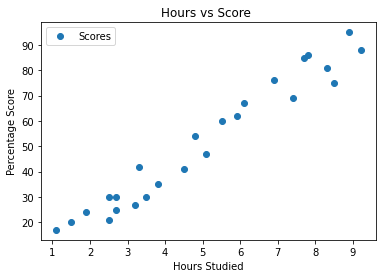

In [22]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score ')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

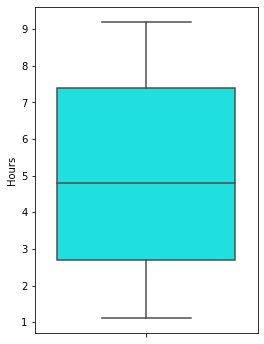

In [23]:
plt.figure(figsize=(4,6))
sns.boxplot(y='Hours',data=dataset,color='cyan')

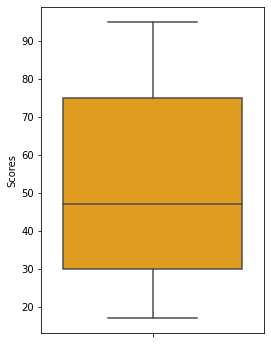

In [24]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='Scores',data=dataset,color='orange')

### G) Preparing the data For Training and Testing

The next step is to divide the data into Inputs as X and Labels (target) as y.

In [25]:
X=dataset.iloc[:,:-1].values 
y=dataset.iloc[:,1].values
print('X:',X[:5])
print('--------------')
print('y:',y[:5])

X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
--------------
y: [21 47 27 75 30]


Split Test and train data  

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)      

It splits 80% of the data to training_set while 20% of the data to test_set. 

### H) Train the Model

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Model Training Completed")

Model Training Completed


Intercept

In [28]:
print(regressor.intercept_)

2.0181600414346974


Slope (coefficient of x)

In [29]:
print(regressor.coef_)

[9.91065648]


In [30]:
line = regressor.coef_*X+regressor.intercept_
line[:5]

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772]])

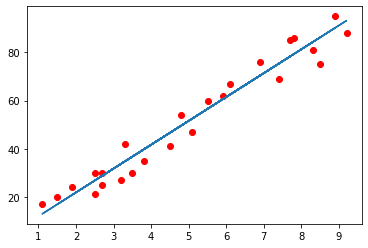

In [31]:
plt.scatter(X, y,color='r')
plt.plot(X, line);
plt.show()

### I) Predicting the Values:

As our model is already trained now it's time to make some prediction.

In [32]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
y_predict=lr.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [37]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [38]:
lr.predict(np.array([[5]]))

array([51.57144244])

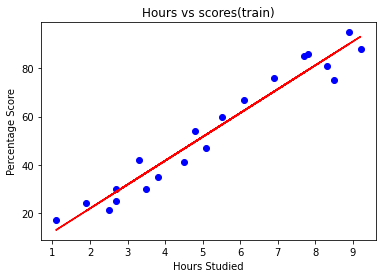

In [39]:
#visualization of trained data
plt.scatter(x_train,y_train,color = 'b')
plt.plot(x_train,lr.predict(x_train),color = 'r')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs scores(train)")
plt.show()

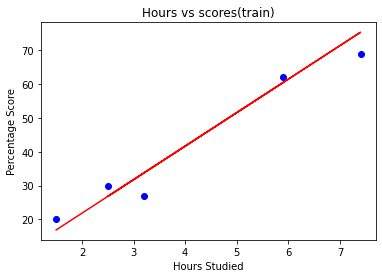

In [40]:
#visualization of Predicted data
plt.scatter(x_test,y_test,color = 'b')
plt.plot(x_test,lr.predict(x_test),color = 'r')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs scores(train)")
plt.show()

#### You can also test your own data as given below.


In [41]:
Study_hours=9.25
own_prediction=regressor.predict([[Study_hours]]).round(3)
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.692


### J) Evaluating the model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
from sklearn import metrics

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Root Of Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Root Of Mean Squared Error: 4.647447612100367
Mean Squared Error: 21.598769307217406


Here MAE and RMSE values are very close, So that error size are less, Our dataset and model are more representative with respect to mean.<br><br>
<b>Hence, our Linear Regression Model works successfully.</b>